In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
files_true = os.listdir(path+'/data_true')
files_pred = os.listdir(path+'/data_pred')

In [3]:
files_true

['CV4_true.xlsx', 'CV1_true.xlsx', 'CV6_true.xlsx', 'CV10_true.xlsx']

In [4]:
files_pred 

['CV4_pred.xlsx', 'CV10_pred.xlsx', 'CV6_pred.xlsx', 'CV1_pred.xlsx']

In [5]:
df_true = pd.DataFrame()
for f in files_true:
    data = pd.read_excel('data_true/'+f,engine='openpyxl')
    df_true = df_true.append(data)

In [6]:
df_pred = pd.DataFrame()
for f in files_pred:
    data = pd.read_excel('data_pred/'+f,engine='openpyxl')
    df_pred = df_pred.append(data)

In [7]:
df_pred

In [8]:
df_true

In [9]:
df_true.shape

(55, 2)

In [10]:
df_pred.shape

(43, 2)

In [11]:
df_true.pivot_table(index = ['Entity Text', 'Entity Label'], aggfunc ='size')

In [12]:
df_pred.pivot_table(index = ['Entity Text', 'Entity Label'], aggfunc ='size') 

In [13]:
df_true = df_true.drop_duplicates(subset=None, keep='first', inplace=False)

In [14]:
df_true.shape

(41, 2)

In [15]:
df_pred = df_pred.drop_duplicates(subset=None, keep='first', inplace=False)

In [16]:
df_pred.shape

(37, 2)

### Métriques globales

In [17]:
def true_positive(df_true,df_pred):
    return len(pd.merge(df_true, df_pred, how='inner')) 

In [18]:
def false_nagative(df_true,df_pred):
    return len(df_true)-len(pd.merge(df_true, df_pred, how='inner'))

In [19]:
def false_positive(df_true,df_pred):
    return len(df_pred)-len(pd.merge(df_true, df_pred, how='inner'))

In [20]:
def accuracy(tp,tn,fp,fn):
    return (tp + tn) / (tp + tn + fp +fn)

def recall(tp,fn):
    return tp / (tp+fn)

def precision(tp,fp):
    try:
        return  tp / (tp + fp)
    except: 
        print ('Error: division by zero.')

def specificity(tn,fp):
    return  tn / (tn+fp)

def f1_score(precision,recall):
    try:
        return  2 * precision * recall / (precision + recall)
    except: 
        print ('Error: division by zero.')

In [21]:
def confusion_matrix(tp,fp,fn,tn,entity):
    fig, ax =plt.subplots(1,1)
    data=[[tp,fn],
          [fp,tn]]
    column_labels=["Positive predicted values", "Negative predicted values"]
    df=pd.DataFrame(data,columns=column_labels)
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Positive actual values","Negative actual values"],loc="center")
    ax.set_title(entity+" confusion matrix")
    plt.show()

In [22]:
tp = true_positive(df_true,df_pred)
fp = false_positive(df_true,df_pred)
fn = false_nagative(df_true,df_pred)
tn = 0

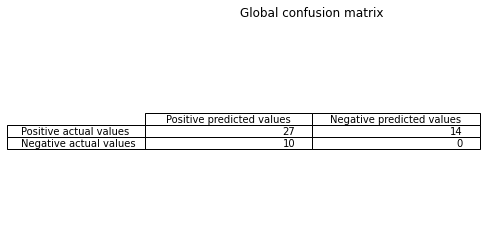

Métriques globales de l'outil : 
 accuracy :  0.5294117647058824
 recall :  0.6585365853658537
 precision :  0.7297297297297297
 f1_score :  0.6923076923076923


In [23]:
confusion_matrix(tp,fp,fn,tn,'Global')
print('Métriques globales de l\'outil : ')
print(' accuracy : ',accuracy(tp,tn,fp,fn))
print(' recall : ',recall(tp,fn))
print(' precision : ',precision(tp,fp))
print(' f1_score : ',f1_score(precision(tp,fp),recall(tp,fn)))

### Métriques par entité

In [24]:
def entity_metrics(df_true,df_pred,entity):
    df_true_entity = df_true[df_true['Entity Label'] == entity]
    df_pred_intermediate = pd.merge(df_true_entity, df_pred, on=['Entity Text'], how='inner')
    df_pred_intermediate = df_pred_intermediate.drop(columns=["Entity Label_x"])
    df_pred_intermediate = df_pred_intermediate.rename(columns = {'Entity Label_y': 'Entity Label'})
    df_pred_entity = df_pred[df_pred['Entity Label'] == entity]
    return df_true_entity,pd.concat([df_pred_intermediate,df_pred_entity]).drop_duplicates()

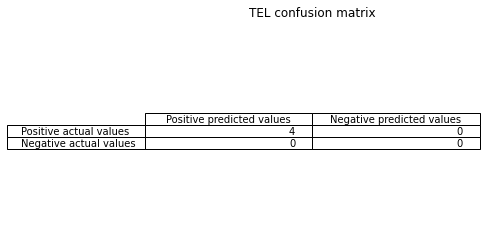

Métriques par entité :  TEL
 accuracy :  1.0
 recall :  1.0
 precision :  1.0
 f1_score :  1.0 



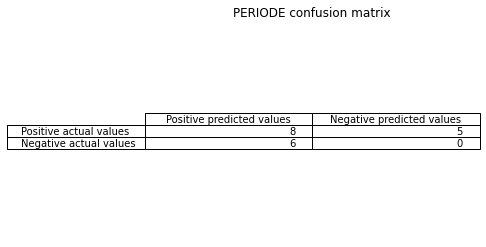

Métriques par entité :  PERIODE
 accuracy :  0.42105263157894735
 recall :  0.6153846153846154
 precision :  0.5714285714285714
 f1_score :  0.5925925925925927 



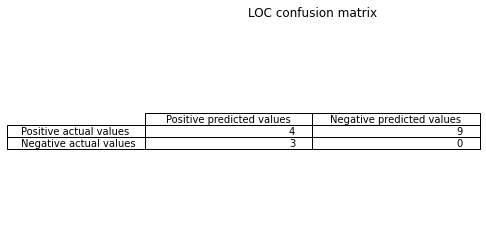

Métriques par entité :  LOC
 accuracy :  0.25
 recall :  0.3076923076923077
 precision :  0.5714285714285714
 f1_score :  0.4 



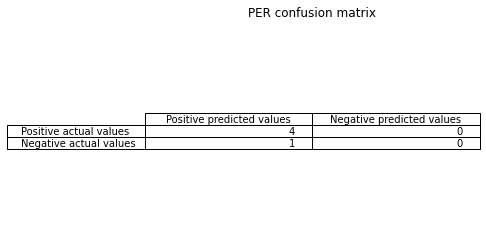

Métriques par entité :  PER
 accuracy :  0.8
 recall :  1.0
 precision :  0.8
 f1_score :  0.888888888888889 



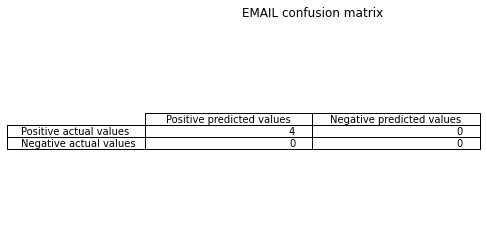

Métriques par entité :  EMAIL
 accuracy :  1.0
 recall :  1.0
 precision :  1.0
 f1_score :  1.0 



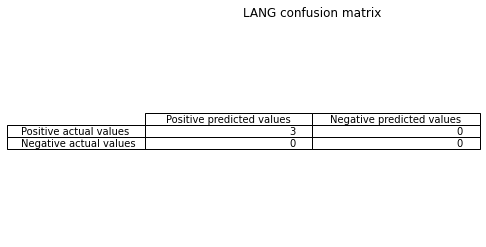

Métriques par entité :  LANG
 accuracy :  1.0
 recall :  1.0
 precision :  1.0
 f1_score :  1.0 



In [25]:
for entity in df_true['Entity Label'].unique():
    tp_entity = true_positive(entity_metrics(df_true,df_pred,entity)[0],entity_metrics(df_true,df_pred,entity)[1])
    fp_entity = false_positive(entity_metrics(df_true,df_pred,entity)[0],entity_metrics(df_true,df_pred,entity)[1])
    fn_entity = false_nagative(entity_metrics(df_true,df_pred,entity)[0],entity_metrics(df_true,df_pred,entity)[1])
    tn_entity = 0
    confusion_matrix(tp_entity,fp_entity,fn_entity,tn_entity, entity)
    print('Métriques par entité : ', entity)
    print(' accuracy : ',accuracy(tp_entity,tn_entity,fp_entity,fn_entity))
    print(' recall : ',recall(tp_entity,fn_entity))
    print(' precision : ',precision(tp_entity,fp_entity))
    print(' f1_score : ',f1_score(precision(tp_entity,fp_entity),recall(tp_entity,fn_entity)),'\n')